### Creating & Visualizing Neural Network for the given data. (Use python) Note: download
### dataset using Kaggal. Keras, ANN visualizer, graph viz libraries are required.

In [1]:
# pip install keras tensorflow

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.read_csv('pima-new.csv')

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df= np.loadtxt('pima-new.csv', delimiter=',')

In [5]:
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
df.shape

(768, 9)

In [7]:
# Input Data
x = df[:, :8]

# Output Data
y = df[:, 8]

In [8]:
from collections import Counter
Counter(y)

Counter({1.0: 268, 0.0: 500})

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [11]:
x_train.shape

(576, 8)

In [12]:
x_test.shape

(192, 8)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

## Build the Model

In [15]:
# Object of Neural Network
model = Sequential()

# Define the Input Layer
layer1 = Dense(0, input_shape= (0,), activation='relu')
model.add(layer1)

# Define the Hiddden Layer
layer2 = Dense(16, activation='relu')
model.add(layer2)

# Deefine the Output Layer
layer3 = Dense(1, activation='sigmoid')
model.add(layer3)

2023-03-18 09:20:26.412344: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-18 09:20:26.412370: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-18 09:20:26.412390: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mihir-Inspiron-15-5501): /proc/driver/nvidia/version does not exist
2023-03-18 09:20:26.413086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 0)                 0         
                                                                 
 dense_1 (Dense)             (None, 16)                16        
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.utils import plot_model

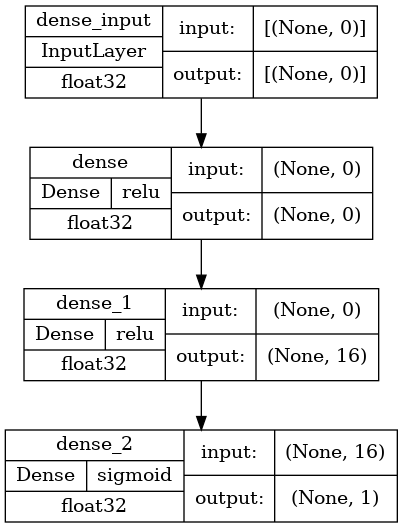

In [18]:
plot_model(model, show_dtype = True, show_layer_activations = True,
          show_shapes = True, show_layer_names =True)

In [19]:
#pip install pydot

In [20]:
#pip install graphviz

## Complete the model

In [21]:
model.compile(loss= 'binary_crossentropy', optimizer= 'adam',
             metrics=['accuracy'])

## Train the Neural Network

In [30]:
model.fit(x_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100


ValueError: in user code:

    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 0), found shape=(None, 8)


## Evaluate the model 

In [32]:
model.evaluate(x_test, y_test, batch_size= 2)

ValueError: in user code:

    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 0), found shape=(2, 8)


In [33]:
new1 = [[2,122,70,27,0,36.8,0.340,27]]
new2 = [[1,126,60,0,0,30.1,0.349,47]]

In [34]:
model.predict(new1)

ValueError: in user code:

    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 0), found shape=(None, 8)


In [35]:
model.predict(new2)

ValueError: in user code:

    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/mihir/.local/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 0), found shape=(None, 8)
